# Exploratory Data Analysis

### Carregando a base

In [26]:
# Carregando pacotes 
library(pryr) # Informações sobre consumo de memória
library(lubridate) # Manipulação de datas
library(dplyr) # Manipulação de DataFrames
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df <- read.csv("./database/Focos.2018-09-01.2019-09-01.csv")

In [3]:
names(df)

[1] "DataHora" "Satelite" "Pais"     "Estado"   "Municipi" "Bioma"   
 [7] "DiaSemCh" "Precipit" "RiscoFog" "Latitude" "Longitud" "AreaIndu"
[13] "FRP"

In [4]:
str(df)

'data.frame':	2336272 obs. of  13 variables:
 $ DataHora: Factor w/ 211999 levels "2018/09/01 00:03:04",..: 1 1 1 2 2 3 3 4 4 4 ...
 $ Satelite: Factor w/ 16 levels "AQUA_M-M","AQUA_M-T",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Pais    : Factor w/ 1 level "Brasil": 1 1 1 1 1 1 1 1 1 1 ...
 $ Estado  : Factor w/ 27 levels "ACRE","ALAGOAS",..: 25 25 25 25 25 9 9 9 9 9 ...
 $ Municipi: Factor w/ 5167 levels "ABADIA DE GOIAS",..: 941 1694 4808 2231 2231 2285 2285 3963 3963 3963 ...
 $ Bioma   : Factor w/ 7 levels "","Amazonia",..: 5 5 5 4 4 5 5 4 4 4 ...
 $ DiaSemCh: int  7 7 7 8 8 8 8 7 7 7 ...
 $ Precipit: num  1.2 1.2 1.2 0.1 0 0 0 0 0 0 ...
 $ RiscoFog: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Latitude: num  -22.9 -22.9 -22.9 -21.6 -21.6 ...
 $ Longitud: num  -50.6 -50.6 -50.6 -48.7 -48.7 ...
 $ AreaIndu: logi  NA NA NA NA NA NA ...
 $ FRP     : num  NA NA NA NA NA NA NA NA NA NA ...


Aparentemente, A coluna de área industrial e FRP tem poucas entrada

In [5]:
paste("Porcentagem de entradas NA em AreaIndu =",
      100*sum(is.na(df$AreaIndu))/nrow(df))

paste("Porcentagem de entradas NA em FRP =",
      100*sum(is.na(df$FRP))/nrow(df))

[1] "Porcentagem de entradas NA em AreaIndu = 100"

[1] "Porcentagem de entradas NA em FRP = 36.2080699507592"

In [6]:
# Verificando quanto de memória ganha-se eliminando a linha de NAs AreaIndu
object_size(df)
df$AreaIndu <- NULL

object_size(df)

187 MB

178 MB

A redução de memória consumida eliminando-se a coluna de AreaIndu foi de 187 - 178 = 9 MB.

In [7]:
levels(df$Pais)

[1] "Brasil"

Como os dados são apenas do Brasil, também não precisamos da coluna de País.

In [8]:
df$Pais <- NULL

object_size(df)

169 MB

Assim, ganhamos mais 9 MB de memória.

A coluna DataHora é do tipo datetime. Vamos convertê-la.

In [9]:
df$DataHora <- ymd_hms(df$DataHora)

In [10]:
object_size(df)

159 MB

Com isso, ganhamos mais 10 MB.

#### Eliminando Dados sem informações de Biomas

In [11]:
df %>% filter(Bioma == '')

DataHora,Satelite,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,FRP
2018-09-21 20:07:26,NOAA-19,RIO GRANDE DO SUL,LAGOA DOS PATOS,,0,0,0.05,-30.63081,-50.79586,NA
2019-07-21 18:00:00,NPP-375,RIO GRANDE DO SUL,LAGOA DOS PATOS,,9,0,0.07,-31.93700,-52.15419,3.6


2 entradas não tem informações de Bioma, para não prejudicar a análise, dada a magnitude pequena da falta de dados, irei ignorar estas duas linhas

In [12]:
df <- df %>% filter(Bioma != '')

In [13]:
levels(df$Bioma)

[1] ""               "Amazonia"       "Caatinga"       "Cerrado"       
[5] "Mata Atlantica" "Pampa"          "Pantanal"

In [14]:
# Precisamos atualizar a lista de factors da coluna de Bioma 
# pois retiramos a entrada com bioma = ''
df$Bioma <- factor(df$Bioma)

In [15]:
levels(df$Bioma)

[1] "Amazonia"       "Caatinga"       "Cerrado"        "Mata Atlantica"
[5] "Pampa"          "Pantanal"

## Dividindo os Dados por Bioma

In [24]:
counts <- table(df$Bioma)
counts


      Amazonia       Caatinga        Cerrado Mata Atlantica          Pampa 
       1322144         138290         669191         138908           7930 
      Pantanal 
         59807 

In [25]:
proportions <- counts / sum(counts)
proportions


      Amazonia       Caatinga        Cerrado Mata Atlantica          Pampa 
   0.565920891    0.059192645    0.286435643    0.059457169    0.003394299 
      Pantanal 
   0.025599353 

In [31]:
df_prop <- as.data.frame(proportions)
names(df_prop) <- c('Bioma', 'proportions')

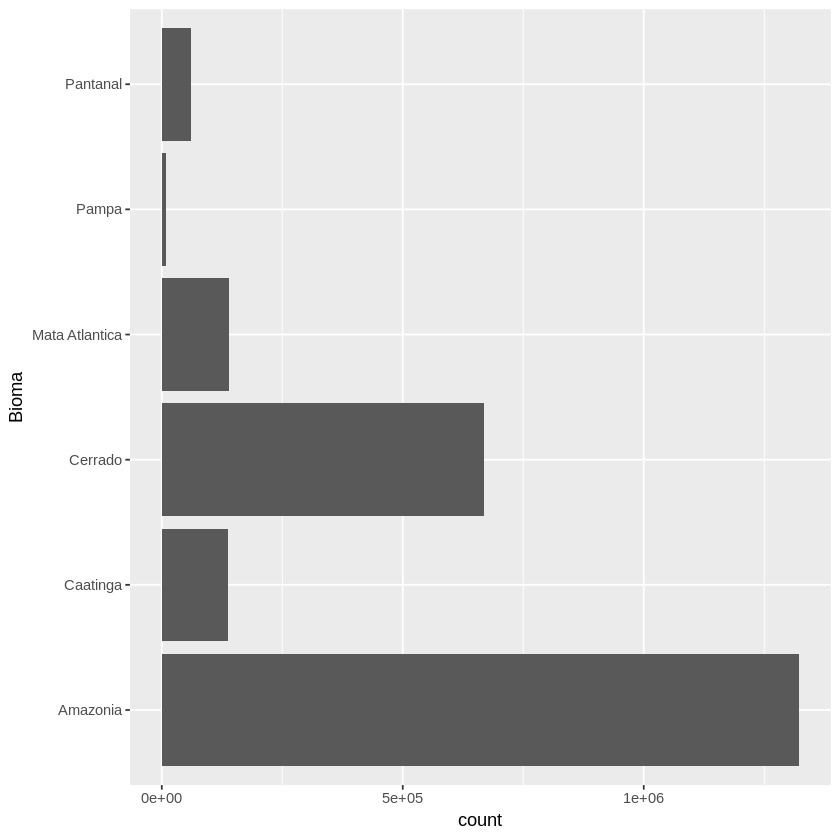

In [50]:
ggplot(df, aes(x = Bioma)) + 
    geom_bar() +
    coord_flip()